In [2]:
import sklearn
import pyod
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt

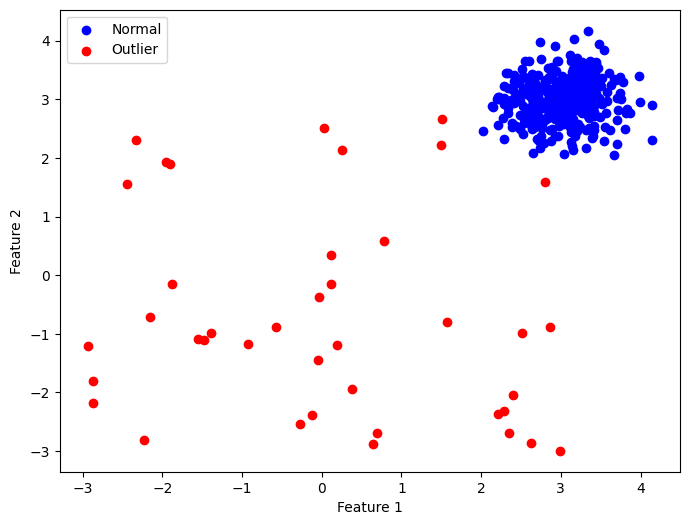

In [108]:
# Ex. 1
# Use the generate data() function from pyod.utils.data to generate a 2-
# dimensional dataset with 500 normal samples (400 training samples and 100
# test samples) with a contamination rate of 0.1.
# Use pyplot.scatter() function to plot the training samples, choosing a different color for the outliers.

X_train, X_test, y_train, y_test = generate_data(
    n_train=400,          # number of training samples
    n_test=100,           # number of test samples
    n_features=2,         # 2D dataset
    contamination=0.1,    # 10% outliers
    # random_state=42
)

# Plot training data
plt.figure(figsize=(8, 6))

# Normal samples (label 0)
plt.scatter(
    X_train[y_train == 0, 0], 
    X_train[y_train == 0, 1], 
    c="blue", label="Normal"
)

# Outliers (label 1)
plt.scatter(
    X_train[y_train == 1, 0], 
    X_train[y_train == 1, 1], 
    c="red", label="Outlier"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

[[88  2]
 [ 0 10]]
Balanced Accuracy: 0.9888888888888889


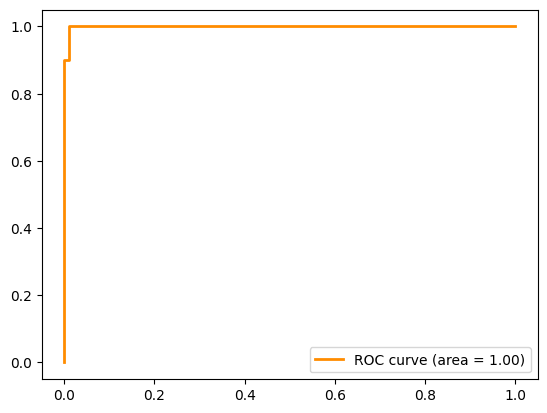

In [109]:
# Ex. 2
# Choose a model from pyod (ex: KNN), leave all the parameters default (except the contamination, which will match the contamination used for dataset
# generation) and fit it with the training data. Get the predictions of the model
# for both the training and the testing data.
# Use the confusion matrix function from sklearn.metrics to find the
# number of TN, TP, FN and FP and compute the balanced accuracy.
# Use the roc curve() function from sklearn.metrics to compute the ROC
# curve and then plot it with plot() function.
# Change the contamination rate used by the model and see how the reported
# metrics change.

import pyod.models.knn as knn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

model = knn.KNN(contamination=0.1)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

dataset_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(dataset_confusion_matrix)

TN, FP, FN, TP = dataset_confusion_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
balanced_accuracy = (sensitivity + specificity) / 2
print("Balanced Accuracy:", balanced_accuracy)

fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

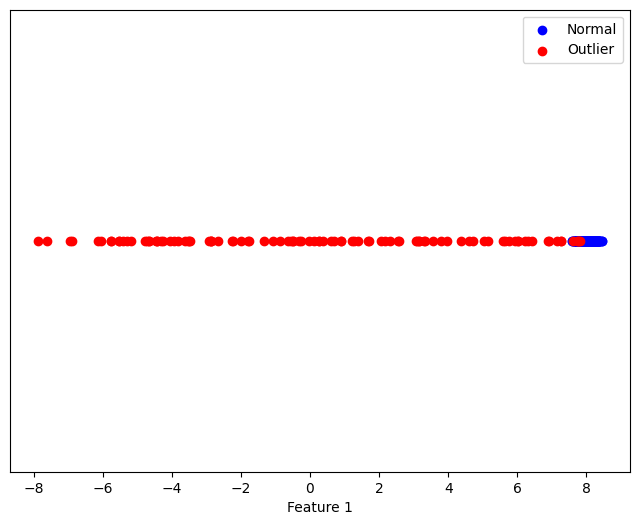

Confusion Matrix:
 [[887  13]
 [ 13  87]]
Balanced Accuracy: 0.9277777777777778


In [122]:
# 3
# Generate a unidimensional dataset with 10 % contamination rate, 1000 training samples and no testing samples using generate data(). Try to detect the
# anomalies in the dataset by using the Z-scores. In order to do that you should
# compute the Z-score threshold that would classify the given percent (contamination rate) of data as anomalies (use np.quantile() function). Compute the
# balanced accuracy of the designed method.
import numpy as np

unidimensional_dataset = generate_data(
    n_train=1000,          # number of training samples
    n_test=0,           # number of test samples
    n_features=1,         # 1D dataset
    contamination=0.1,    # 10% outliers
    # random_state=42
)
X_uni_train, _, y_uni_train, _ = unidimensional_dataset

plt.figure(figsize=(8, 6))
plt.scatter(
    X_uni_train[y_uni_train == 0], 
    [0]*len(X_uni_train[y_uni_train == 0]), 
    c="blue", label="Normal"
)
plt.scatter(
    X_uni_train[y_uni_train == 1], 
    [0]*len(X_uni_train[y_uni_train == 1]), 
    c="red", label="Outlier"
)
plt.xlabel("Feature 1")
plt.yticks([])
plt.legend()
plt.show()

# Compute Z-scores
# Z = (X - mean) / std
z_scores = (X_uni_train - np.mean(X_uni_train)) / np.std(X_uni_train)
threshold = np.quantile(np.abs(z_scores), 0.9)
y_uni_pred = (np.abs(z_scores) > threshold).astype(int)

uni_confusion_matrix = confusion_matrix(y_uni_train, y_uni_pred)
print("Confusion Matrix:\n", uni_confusion_matrix)

TN, FP, FN, TP = uni_confusion_matrix.ravel()
balanced_accuracy = ((TP / (TP + FN)) + (TN / (TN + FP))) / 2
print("Balanced Accuracy:", balanced_accuracy)

Threshold for multidimensional data: 2.6120320653472873


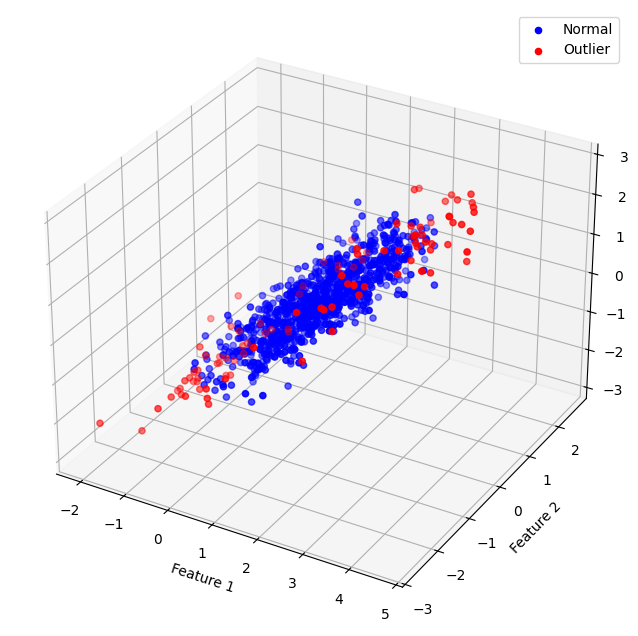

In [155]:
# Ex. 4
# Same as Ex. 3 but for a multidimensional dataset. Choose your own mean
# vector µ and covariance matrix Σ and build your dataset by hand starting with
# the samples generated from a multivariate standard normal distribution, x ∼
# N (0, I). Using the Cholesky decomposition of the covariance matrix Σ = LLT
# draw your samples y like this: y = Lx + µ and then compute the Z-scores. All
# other tasks as in Ex. 3.

rng = np.random.default_rng()

mean_vector = np.array(
    [1, 0, 0]
    )
cov_matrix = np.array([
    [1.0, 0.0, 0.9],
    [0.0, 1.0, 0.0],
    [0.9, 0.0, 1.0]
])
# 1000 samples from N(0, I)
x_normal = rng.standard_normal(size=(1000, 3))
L = np.linalg.cholesky(cov_matrix)
y_hand_made = x_normal @ L.T + mean_vector
# Compute Z-scores
z_scores_multi = (y_hand_made - np.mean(y_hand_made, axis=0)) / np.std(y_hand_made, axis=0)
z_scores_multi_magnitude = np.linalg.norm(z_scores_multi, axis=1)
threshold_multi = np.quantile(z_scores_multi_magnitude, 0.9)
y_multi_pred = (z_scores_multi_magnitude > threshold_multi).astype(int)

# Since we don't have true labels, we can't compute a confusion matrix or balanced accuracy here.
print("Threshold for multidimensional data:", threshold_multi)
# plot the data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    y_hand_made[y_multi_pred == 0, 0], 
    y_hand_made[y_multi_pred == 0, 1], 
    y_hand_made[y_multi_pred == 0, 2], 
    c="blue", label="Normal"
)
ax.scatter(
    y_hand_made[y_multi_pred == 1, 0], 
    y_hand_made[y_multi_pred == 1, 1], 
    y_hand_made[y_multi_pred == 1, 2], 
    c="red", label="Outlier"
)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.show()
